# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

Vraag 3
0.23809523809523808
2.0


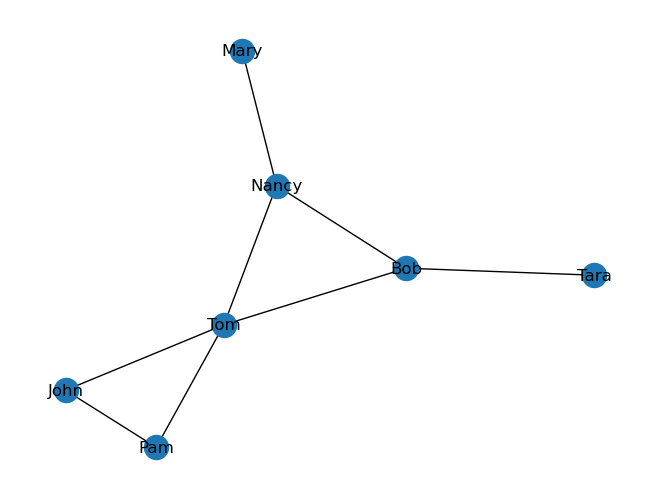

In [2]:
## Vraag 1
Fig35=nx.Graph()
Fig35.add_nodes_from(["Tom", "John", "Pam", "Nancy", "Mary", "Tara", "Bob"])
Fig35.add_edges_from([("Tom", "John"), ("Tom", "Pam"), ("Tom", "Nancy"), ("Tom", "Bob"), ("John","Pam"), ("Nancy", "Bob"), ("Bob", "Tara"), ("Nancy", "Mary")])
nx.draw(Fig35, with_labels=True)

## Vraag 2
# Hiervoor wordt de formule sum(1/aantal nodes * 1/degree(node)). Tom heeft intotaal 4 vrienden. Door deze rekensom voor alle bij elkaar op te tellen, komt 5/21.

## Vraag 3
def kans_op_knoop(G,knoop):
    neighbors = list(G.neighbors(knoop))
    N = G.number_of_nodes()
    teller = 0
    for node in neighbors:
        teller = teller + ((1/N) * (1/(G.degree(node))))
    return teller
print("Vraag 3")
print(kans_op_knoop(Fig35, "Tom"))   

## Vraag 4
G = nx.Graph()
G.add_edges_from([(1,2), (1,3),(1,4), (2,3), (3,5)])
G.add_nodes_from([1,2,3,4,5])
# print(advanced(G,1))

## Vraag 5
def advanced(G, knoop):
    teller = 0
    for x in list(G.neighbors(knoop)):
        teller = teller + G.degree(x)
    return (teller - G.degree(knoop))/G.degree(knoop)
print(advanced(Fig35, "Mary"))   

# H= nx.karate_club_graph() 
# # test
# sum(kans_op_knoop(H,x) for x in H)
# #kans_op_knoop(H,1)

In [3]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


# First course

Maak de sommen 3.11-3.24.

In [4]:
## Opgave 3.11
H = nx.Graph()
H.add_edges_from([(1,2),(2,3),(1,3),(2,5),(5,6),(5,7),(3,4)])
H.add_nodes_from([1,2,3,4,5,6,7])

# Degree centrality
Degree = nx.degree_centrality(H)
print(Degree)

# Betweenness centrality
betweenness = nx.betweenness_centrality(H)
print(betweenness)

# Closeness
closeness = {x: nx.closeness_centrality(H,x) for x in H.nodes()}
print(closeness)

{1: 0.3333333333333333, 2: 0.5, 3: 0.5, 5: 0.5, 6: 0.16666666666666666, 7: 0.16666666666666666, 4: 0.16666666666666666}
{1: 0.0, 2: 0.6, 3: 0.3333333333333333, 5: 0.6, 6: 0.0, 7: 0.0, 4: 0.0}
{1: 0.5, 2: 0.6666666666666666, 3: 0.5454545454545454, 5: 0.6, 6: 0.4, 7: 0.4, 4: 0.375}


3.11
a) 2,3,5
b) 2, 5
c) 2

3.12
Dit netwerk ziet eruit als dat 8 nodes een degree hebben van 2 en 2 nodes een degree hebben van 1.

3.13
<br>
    1. Ik denk hier niet. Ik denk dat dit vrij normaal verdeeld is. Veel maten zullen voorkomen bij bijvoorbeeld 40 tm 43. 
    <br>
    2. Ik verwacht dat inkomen heel erg gevarieerd is en dus ook heel erg normaal verdeeld.
    <br>
    3. Ik verwacht dat dit ook heel erg verdeeld kan zijn. Sommige mensen hebben een klein sociaal netwerk en anderen hebben een extreem groot netwerk.
    <br>
    4. Ik verwacht dat deze heel erg heavily tailed is. Ik denk dat het bereiken van andere mensen door vrienden heel close is. Ik denk dat bij een bepaalde waarde veel mensen zullen zijn die hierin overeenkomen.
    <br>

3.14
Dit ligt eraan of de persoon een outlier is of behoort tot de groep. Inprincipe als het heavily tailed is, is de kans zeer groot dat de persoon tot het overgrote deel behoort en zal ik mogelijk niet verbaasd zijn.

3.15
a) 5e+08
b) 5e+06
c) 10000

3.16
Het is maar opgenomen tot 20. Daarna is een rechte lijn aangenomen. Dit betekent dat een persoon niet meer dan 20 sexpartners in de afgelopen 12 maanden mag hebben. Verschillende subnetwerken hoeven niet dezelfde distributie te hebben. Mogelijk door de grote sample, is de kans wel zeer groot dat deze mogelijk gelijk zijn aan elkaar.

3.20
Ja deze bestaan. Dit kan bijvoorbeeld door een driehoek. Hierbij hebben de buren ook 2 buren en is de average degree ook 2.

3.21
Jazker. Dit komt omdat een overgroot gedeelte zich bevindt in dezelfde groep. 

3.22 
d, want als een node met een hoge betweenness centrality wordt gebroken, dan is er een gedeelte niet meer verbonden in dit netwerk mogelijk. Hoe hoger deze waarde, hoe meer belangrijke paden tussen nodes hier doorheen gaan.

3.23
Een node met een lage clusteringscoefficient. Een node met een hoge clustering coefficient is meer verbonden en dus minder essentieel dan een node met een lage clusteringscoefficient die minder verbonden is en dus mogelijk meer als een brug dient.

In [5]:
## Vraag 3.17
fname='../../../data/Week6/openflights_usa.edges.gz'
G= nx.Graph()
G = nx.read_edgelist(fname)

## Vraag 1
Dict = {x: G.degree(x) for x in G.nodes()}
teller = 0
keys = 0
for k,v in Dict.items():
    teller = teller + v
    keys += 1
Gemiddelde = teller / keys
print(Gemiddelde)

## Vraag 2
Sorted_dict = {k: v for k, v in sorted(Dict.items(), key=lambda item: item[1], reverse=True)}
print(list(Sorted_dict)[0:5])

## Vraag 3
antwoord = 0
for k,v in Sorted_dict.items():
    if v == 1:
        antwoord += 1
print(antwoord)

## Vraag 4
betweenness = nx.betweenness_centrality(G)
max1_value = max(betweenness.values())
print(max1_value)

## Vraag 5
closeness = {x: nx.closeness_centrality(G,x) for x in G.nodes()}
max2_value = max(closeness.values())
print(max2_value)

10.186813186813186
['ATL', 'ORD', 'DEN', 'DFW', 'MSP']
156
0.3189906081983969
0.5038803683651619


In [6]:
fname1='../../../data/Week6/enwiki_math.edges.gz'
L= nx.DiGraph()
L = nx.read_edgelist(fname1)

## Vraag 1
In_degree = [ L.in_degree([x]) for x in L]
print(In_degree)

AttributeError: 'Graph' object has no attribute 'in_degree'

In [7]:
## Vraag 3.19
def average_neighbor(G, knoop):
    teller = 0
    for x in list(G.neighbors(knoop)):
        teller = teller + G.degree(x)
        print(teller)
    return teller / len(list(G.neighbors(knoop)))
print(average_neighbor(Fig35, "Bob"))  

4
7
8
2.6666666666666665


In [8]:
## Vraag 3.24
fname='../../../data/Week6/socfb-Northwestern25.edges.gz'
K = nx.Graph()
K = nx.read_edgelist(fname)

## Vraag 1
boven = 0
onder = 0
for x in K:
    if K.degree(x) >= 100:
        boven += 1
    else:
        onder += 1
print(boven/(boven+onder))

## Vraag 2
print(max([K.degree(x) for x in K])) #maximale degree
print(len(K) - 1) #maximaal mogelijke degree

## Vraag 3
Dict = {x:K.degree(x) for x in K}
teller = 0
keys = 0
for k,v in Dict.items():
    if v > teller:
        teller = v
        keys = k
print(keys)

## Vraag 4
factor = int(len(K) * 0.95)
Sorted_dict = {k: v for k, v in sorted(Dict.items(), key=lambda item: item[1], reverse=False)}
node = list(Sorted_dict)[factor]
print(K.degree(node))

## Vraag 5
import numpy as np

print(np.array(list(Dict.values())).mean())

## Vraag 6
print("d")

0.3821330557395666
2105
10566
8262
244
92.42680041639065
d
